**DATASET**:<br>
V2-C (contains all gas scans readings, no gas_scan_cnt dropping, split randomly) [final dataset] <br>
**FEATURES**:<br>
gas_scan_0 - gas_scan-9

In [38]:
from google.colab import drive

In [39]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **LIBRARY**

In [142]:
import pickle
import joblib
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# **LOAD DATA**

In [120]:
train = pd.read_csv('/content/drive/MyDrive/Proyek/Omdena/Dryad/final dataset - v2/C - random split/train_set.csv').drop(columns=['Unnamed: 0'], axis=1) 
val = pd.read_csv('/content/drive/MyDrive/Proyek/Omdena/Dryad/final dataset - v2/C - random split/valid_set.csv').drop(columns=['Unnamed: 0'], axis=1) 
test = pd.read_csv('/content/drive/MyDrive/Proyek/Omdena/Dryad/final dataset - v2/C - random split/test_set.csv').drop(columns=['Unnamed: 0'], axis=1) 

In [121]:
train

,sensor_node_id,scan_time,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,humid_0,humid_1,humid_2,humid_3,humid_4,humid_5,humid_6,humid_7,humid_8,humid_9,gas_scan_0,gas_scan_1,gas_scan_2,gas_scan_3,gas_scan_4,gas_scan_5,gas_scan_6,gas_scan_7,gas_scan_8,gas_scan_9,gas_scan_cnt,encoded_specimen,trigger,burn_material,burn_material_amount(g),end_time,hotplate_start,hotplate_temp,experiment,sensor_hotplate_distance,start_time,venue
0,146,2021-09-22 14:17:57.604412+00:00,19.2,19.4,19.9,19.9,20.0,20.2,20.3,20.2,20.4,20.5,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,63.0,102400000.0,131300.0,2034200.0,101300.0,445200.0,287200.0,230800.0,84000.0,203900.0,233000.0,6,1,manual,Other,NaN,2021-09-23 08:07:00+00:00,2021-09-22 10:32:00+00:00,open fire,23,30m,2021-09-22 08:30:00+00:00,hall
1,133,2021-09-16 12:25:15.324337005+00:00,22.3,22.5,23.1,23.1,23.2,23.5,23.5,23.5,23.7,23.8,63.0,63.0,62.0,62.0,62.0,62.0,61.0,61.0,61.0,60.0,102400000.0,392000.0,14099800.0,312400.0,1728900.0,1308600.0,1075600.0,246900.0,411900.0,478200.0,1,1,manual,SP1,700.0,2021-09-16 15:33:00+00:00,2021-09-16 10:25:00+00:00,320,18,30m,2021-09-16 08:37:00+00:00,hall
2,137,2021-09-23 05:06:45.271254+00:00,16.9,17.1,17.6,17.6,17.7,17.9,18.0,17.9,18.1,18.2,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,63.0,102400000.0,187200.0,5832600.0,148100.0,751200.0,572000.0,483300.0,126900.0,248000.0,280100.0,5,1,manual,Other,NaN,2021-09-23 08:07:00+00:00,2021-09-22 10:32:00+00:00,open fire,23,30m,2021-09-22 08:30:00+00:00,hall
3,146,2021-09-21 19:43:16.044648885+00:00,17.9,18.1,18.6,18.6,18.7,18.9,19.0,18.9,19.1,19.2,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,102400000.0,340100.0,15020800.0,284100.0,1602100.0,1239700.0,1037200.0,238900.0,430800.0,488200.0,5,1,manual,BM2,600.0,2021-09-22 08:00:00+00:00,2021-09-21 12:04:00+00:00,320,22,30m,2021-09-21 08:30:00+00:00,hall
4,139,2021-09-18 09:47:36.420599937+00:00,19.1,19.3,19.8,19.8,19.9,20.1,20.2,20.1,20.3,20.4,70.0,70.0,70.0,70.0,70.0,70.0,69.0,69.0,69.0,69.0,102400000.0,358700.0,16445600.0,303800.0,1806700.0,1415800.0,1182700.0,259100.0,428700.0,483300.0,3,1,manual,SP1,700.0,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,136,2021-09-23 08:54:24.014122962+00:00,20.5,20.6,21.1,21.1,21.2,21.4,21.5,21.5,21.7,21.7,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,53.0,53.0,102400000.0,233000.0,7546700.0,177300.0,922300.0,683100.0,571500.0,150900.0,308500.0,354600.0,14,0,manual,SP1,0.1,2021-09-23 12:12:00+00:00,2021-09-23 10:20:00+00:00,250,24,4m,2021-09-23 08:44:00+00:00,chamber
9075,133,2021-09-17 13:32:47.662655115+00:00,21.5,21.6,22.1,22.1,22.2,22.4,22.4,22.4,22.6,22.6,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,102400000.0,589300.0,32940900.0,515400.0,3351800.0,2678800.0,2286300.0,419500.0,599100.0,663200.0,4,1,manual,SP1,700.0,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall
9076,137,2021-09-18 09:47:00.714418888+00:00,19.2,19.4,19.9,19.9,20.0,20.2,20.3,20.3,20.5,20.5,69.0,69.0,69.0,69.0,69.0,68.0,68.0,68.0,68.0,67.0,102400000.0,207000.0,7657800.0,165900.0,871600.0,685100.0,583800.0,141500.0,258700.0,294600.0,4,1,manual,SP1,700.0,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall
9077,146,2021-09-18 11:52:10.865521907+00:00,19.4,19.6,20.1,20.1,20.2,20.4,20.5,20.4,20.6,20.7,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,65.0,102400000.0,412900.0,20838100.0,344300.0,2022200.0,1606900.0,1338100.0,288900.0,480900.0,540300.0,6,1,manual,SP1,700.0,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall


In [122]:
val

,sensor_node_id,scan_time,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,humid_0,humid_1,humid_2,humid_3,humid_4,humid_5,humid_6,humid_7,humid_8,humid_9,gas_scan_0,gas_scan_1,gas_scan_2,gas_scan_3,gas_scan_4,gas_scan_5,gas_scan_6,gas_scan_7,gas_scan_8,gas_scan_9,gas_scan_cnt,encoded_specimen,trigger,burn_material,burn_material_amount(g),end_time,hotplate_start,hotplate_temp,experiment,sensor_hotplate_distance,start_time,venue
0,132,2021-09-21 23:38:03.473740100+00:00,17.5,17.6,18.1,18.1,18.2,18.4,18.5,18.4,18.6,18.7,66.0,66.0,66.0,66.0,66.0,66.0,65.0,65.0,65.0,65.0,102400000.0,466100.0,30166100.0,410600.0,2634900.0,2301700.0,2058800.0,349200.0,515400.0,578300.0,3,1,manual,BM2,600.000,2021-09-22 08:00:00+00:00,2021-09-21 12:04:00+00:00,320,22,30m,2021-09-21 08:30:00+00:00,hall
1,137,2021-09-22 12:10:52.581808090+00:00,18.6,18.8,19.3,19.3,19.4,19.6,19.7,19.6,19.8,19.9,66.0,66.0,67.0,67.0,67.0,66.0,66.0,66.0,66.0,65.0,19106700.0,46200.0,390400.0,34300.0,122300.0,79500.0,65900.0,30000.0,81400.0,94400.0,5,1,manual,Other,NaN,2021-09-23 08:07:00+00:00,2021-09-22 10:32:00+00:00,open fire,23,30m,2021-09-22 08:30:00+00:00,hall
2,137,2021-09-08 15:18:10.162198066+00:00,25.3,25.5,26.0,26.1,26.1,26.4,26.4,26.4,26.6,26.7,49.0,49.0,49.0,49.0,49.0,48.0,48.0,48.0,48.0,48.0,41517800.0,70900.0,878900.0,54300.0,221400.0,150800.0,130000.0,50000.0,115200.0,128000.0,3,1,manual,BM2,0.066,2021-09-08 16:00:32+00:00,2021-09-08 13:44:32+00:00,500,13,4m,2021-09-08 12:16:44+00:00,chamber
3,192,2021-09-16 09:24:20.258769035+00:00,20.9,21.0,21.5,21.5,21.6,21.9,21.9,21.9,22.1,22.2,67.0,67.0,67.0,67.0,67.0,66.0,66.0,66.0,66.0,65.0,102400000.0,339500.0,14560300.0,284300.0,1606900.0,1201500.0,1004400.0,242800.0,433800.0,486400.0,4,0,manual,SP1,700.000,2021-09-16 15:33:00+00:00,2021-09-16 10:25:00+00:00,320,18,30m,2021-09-16 08:37:00+00:00,hall
4,143,2021-09-19 00:51:19.389713048+00:00,18.1,18.2,18.7,18.7,18.7,19.0,19.0,19.0,19.2,19.3,61.0,62.0,62.0,62.0,62.0,62.0,61.0,61.0,61.0,61.0,102400000.0,347400.0,20109200.0,289900.0,1695700.0,1303600.0,1097200.0,238900.0,423900.0,476900.0,5,1,manual,SP1,700.000,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,136,2021-09-18 07:46:39.191803932+00:00,18.7,18.9,19.3,19.3,19.4,19.7,19.7,19.7,19.9,20.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,66.0,66.0,102400000.0,276500.0,10479000.0,225500.0,1187900.0,908800.0,768100.0,192500.0,358400.0,411100.0,3,1,manual,SP1,700.000,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall
2115,146,2021-09-19 05:50:48.820672+00:00,17.9,18.1,18.6,18.6,18.6,18.9,18.9,18.9,19.1,19.2,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,61.0,102400000.0,462700.0,25575000.0,390400.0,2325200.0,1857100.0,1583600.0,323100.0,532300.0,592900.0,6,1,manual,SP1,700.000,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall
2116,132,2021-09-06 15:45:16.554568052+00:00,22.2,22.4,22.9,22.9,23.0,23.2,23.3,23.2,23.4,23.5,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,58.0,58.0,46119600.0,85900.0,1607800.0,70200.0,296900.0,193000.0,145800.0,52100.0,123400.0,139600.0,5,1,manual,Scott Pine branches in fire bowl,NaN,2021-09-06 16:30:22+00:00,2021-09-06 10:58:09+00:00,open fire,9,30m,2021-09-06 09:04:03+00:00,hall
2117,136,2021-09-03 15:12:33.358366012+00:00,21.6,21.7,22.2,22.3,22.3,22.6,22.6,22.6,22.8,22.9,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,59.0,59.0,76830000.0,114900.0,2142800.0,87900.0,389700.0,282400.0,241300.0,79500.0,186600.0,220000.0,2,1,manual,SP2,600.000,2021-09-03 16:15:33+00:00,2021-09-03 11:00:54+00:00,250,8,30m,2021-09-03 09:53:08+00:00,hall


In [123]:
test

,sensor_node_id,scan_time,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,humid_0,humid_1,humid_2,humid_3,humid_4,humid_5,humid_6,humid_7,humid_8,humid_9,gas_scan_0,gas_scan_1,gas_scan_2,gas_scan_3,gas_scan_4,gas_scan_5,gas_scan_6,gas_scan_7,gas_scan_8,gas_scan_9,gas_scan_cnt,encoded_specimen,trigger,burn_material,burn_material_amount(g),end_time,hotplate_start,hotplate_temp,experiment,sensor_hotplate_distance,start_time,venue
0,133,2021-09-07 13:57:33.837836980+00:00,26.8,26.9,27.5,27.5,27.6,27.8,27.9,27.8,28.0,28.1,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,47.0,47.0,102400000.0,297200.0,8484700.0,241600.0,1230700.0,889200.0,713000.0,180500.0,333500.0,390400.0,3,1,manual,SP2,0.30,2021-09-07 14:10:59+00:00,2021-09-07 11:34:56+00:00,250,10,4m,2021-09-07 09:25:36+00:00,chamber
1,139,2021-09-01 15:23:43.212620019+00:00,21.3,21.5,22.0,22.0,22.1,22.3,22.4,22.3,22.5,22.6,66.0,66.0,66.0,66.0,66.0,66.0,65.0,65.0,65.0,65.0,102400000.0,173200.0,4772500.0,139500.0,705700.0,528200.0,434700.0,118100.0,245100.0,279900.0,5,1,manual,SP2,600.00,2021-09-01 18:50:46+00:00,2021-09-01 10:03:57+00:00,500,6,30m,2021-09-01 08:30:22+00:00,hall
2,146,2021-09-22 09:13:48.128213882+00:00,17.5,17.6,18.1,18.2,18.2,18.5,18.5,18.5,18.7,18.8,67.0,68.0,68.0,68.0,68.0,68.0,67.0,67.0,67.0,67.0,102400000.0,316800.0,14378200.0,267000.0,1470700.0,1161600.0,986900.0,224900.0,404100.0,464600.0,3,0,manual,Other,NaN,2021-09-23 08:07:00+00:00,2021-09-22 10:32:00+00:00,open fire,23,30m,2021-09-22 08:30:00+00:00,hall
3,134,2021-09-22 12:08:38.214323043+00:00,18.9,19.0,19.5,19.5,19.6,19.8,19.9,19.9,20.1,20.1,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,66.0,68248800.0,110300.0,2176900.0,86700.0,358400.0,239400.0,181100.0,63600.0,140000.0,162900.0,6,1,manual,Other,NaN,2021-09-23 08:07:00+00:00,2021-09-22 10:32:00+00:00,open fire,23,30m,2021-09-22 08:30:00+00:00,hall
4,140,2021-09-15 12:37:04.408329010+00:00,24.8,24.9,25.4,25.4,25.5,25.7,25.8,25.7,26.0,26.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,102400000.0,429500.0,20371700.0,387800.0,2187400.0,1779700.0,1469100.0,299300.0,415900.0,463600.0,6,0,manual,SP1,0.10,2021-09-15 15:09:00+00:00,2021-09-15 13:26:00+00:00,500,20,4m,2021-09-15 12:30:00+00:00,chamber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,137,2021-09-23 12:34:29.403928995+00:00,21.0,21.2,21.7,21.7,21.8,22.1,22.1,22.1,22.3,22.3,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,52.0,52.0,102400000.0,127600.0,2474900.0,96100.0,438900.0,310400.0,256900.0,82100.0,183600.0,211900.0,4,0,manual,SP2,0.05,2021-09-23 14:45:00+00:00,2021-09-23 13:21:00+00:00,500,25,4m,2021-09-23 12:30:00+00:00,chamber
3930,136,2021-09-03 10:04:20.061022996+00:00,20.6,20.8,21.2,21.3,21.3,21.6,21.6,21.6,21.8,21.9,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,58.0,102400000.0,217000.0,8673300.0,173200.0,899200.0,710800.0,618100.0,148600.0,282200.0,318000.0,5,0,manual,SP2,600.00,2021-09-03 16:15:33+00:00,2021-09-03 11:00:54+00:00,250,8,30m,2021-09-03 09:53:08+00:00,hall
3931,134,2021-09-17 11:26:17.598664045+00:00,20.3,20.5,21.0,21.0,21.1,21.3,21.4,21.4,21.6,21.6,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,65.0,102400000.0,376200.0,17499500.0,307400.0,1697800.0,1355300.0,1147900.0,247100.0,431400.0,498500.0,3,1,manual,SP1,700.00,2021-09-20 19:30:00+00:00,2021-09-17 10:15:00+00:00,500,21,30m,2021-09-17 08:45:00+00:00,hall
3932,140,2021-09-03 15:09:23.727550029+00:00,21.8,21.9,22.4,22.4,22.5,22.7,22.8,22.8,23.0,23.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,102400000.0,648100.0,41916200.0,606600.0,3953600.0,3335500.0,2828700.0,491700.0,586800.0,622600.0,2,1,manual,SP2,600.00,2021-09-03 16:15:33+00:00,2021-09-03 11:00:54+00:00,250,8,30m,2021-09-03 09:53:08+00:00,hall


# **PREPROCESSING**

In [124]:
features = ['gas_scan_0', 'gas_scan_1',
            'gas_scan_2', 'gas_scan_3', 
            'gas_scan_4', 'gas_scan_5', 
            'gas_scan_6', 'gas_scan_7', 
            'gas_scan_8', 'gas_scan_9']

In [125]:
X_train = train[features]
y_train = train['encoded_specimen']

X_val = val[features]
y_val = val['encoded_specimen']

X_test = test[features]
y_test = test['encoded_specimen']

# **MODELING**

**FUNCTION**

In [129]:
def knn_tune_fit(X_train, y_train):

  # defining model
  knn = KNeighborsClassifier()

  # hyperparameter tuning
  params = {
    'n_neighbors':np.arange(3,21),
    'p':[1,2],
    'leaf_size':np.arange(30,50)
  }

  grid_search = GridSearchCV(knn, params, scoring='f1', cv=5)

  # training and finding best parameter
  start = datetime.now()
  grid_search.fit(X_train, y_train)
  duration = datetime.now() - start

  print('Training duration: ', duration)

  # best model
  print('Best model:\n', grid_search.best_estimator_)
  best_knn = grid_search.best_estimator_

  return best_knn

In [145]:
def model_metrics(y_test, y_pred, model):

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  print('Confusion matrix: \n', confusion_matrix(y_test, y_pred),'\n') # confusion matrix

  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  sns.heatmap(cm, annot=True, fmt=".1f", cmap='cividis', xticklabels=['Clean Air', 'In Smoke'], yticklabels=['Clean Air', 'In Smoke'])

  print('Classification report: \n', classification_report(y_test, y_pred),'\n') # classification report
  print('Precision: {:0.2f}%'.format(round(precision_score(y_test, y_pred), 4)*100)) # precision
  print('Recall: {:0.2f}%'.format(round(recall_score(y_test, y_pred), 4)*100)) # recall
  print('Specificity: {:0.2f}%'.format(round(tn/(tn+fp), 4)*100)) # specificity
  print('F1-Score: {:0.2f}%'.format(round(f1_score(y_test, y_pred), 4)*100)) # f1-score

**IMPLEMENTATION**

In [131]:
best_knn = knn_tune_fit(X_train, y_train)

Training duration:  0:04:48.081730
Best model:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')


In [136]:
y_pred = best_knn.predict(X_test)

Confusion matrix: 
 [[ 176  582]
 [ 106 3070]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.23      0.34       758
           1       0.84      0.97      0.90      3176

    accuracy                           0.83      3934
   macro avg       0.73      0.60      0.62      3934
weighted avg       0.80      0.83      0.79      3934
 

Precision: 84.06%
Recall: 96.66%
Specificity: 23.22%
F1-Score: 89.92%


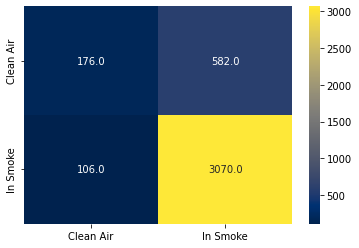

In [146]:
model_metrics(y_test,  y_pred, best_knn)

In [147]:
joblib.dump(best_knn, 'best_knn.pkl', compress = 1) 

['best_knn.pkl']